**Linear and Logistic Regression**

**Question 1:**<br>
**Part a:** <br>
We usually estimate the mean of P(y∣X) because we aim to express the value of y in terms of x. Given the features X, the distribution P(y∣X) provides a reliable estimate of the expected value of y, which is often the most useful summary of the relationship between y and X for prediction and interpretation purposes<br>

**Part b:**

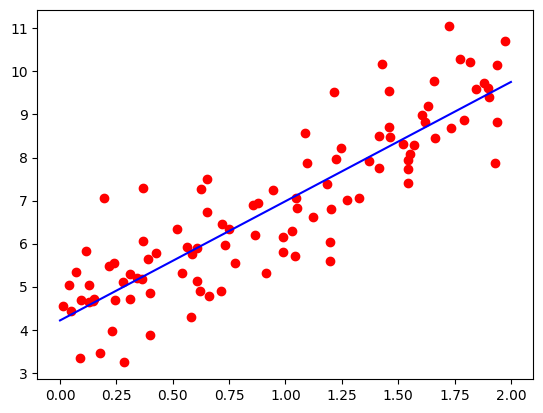

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

a=np.arange(0,2.5)
plt.scatter(X,y,color='red')
plt.plot(a,model.predict(a),color='blue')
plt.show()

parameterizing $\sigma$ can be useful when errors are more widely distributed, it provides more acuurate uncertainity estimates but the cons of parameterizing $\sigma$ is that the normal equation for calculating weights cannot be used and a recursive optimization method should be used which increases complexity, it may also lead to overfitting.

**Question 2:**

In [1]:
import numpy as np
import pandas as pd
A_train=pd.read_csv("train_set_A.csv")
A_test=pd.read_csv("test_set_A.csv")
B_train=pd.read_csv("train_set_B.csv")
B_test=pd.read_csv("test_set_B.csv")
C_train=pd.read_csv("train_set_C.csv")
C_test=pd.read_csv("test_set_C.csv")

In [4]:
from sklearn.linear_model import LinearRegression
model_a=LinearRegression()
model_a.fit(A_train[['x']],A_train[['y']])

LinearRegression()

In [5]:
a_a=model_a.predict(A_test[['x']])
a_b=model_a.predict(B_test[['x']])
a_c=model_a.predict(C_test[['x']])

In [6]:
model_b=LinearRegression()
model_b.fit(B_train[['x']],B_train[['y']])

LinearRegression()

In [7]:
b_a=model_b.predict(A_test[['x']])
b_b=model_b.predict(B_test[['x']])
b_c=model_b.predict(C_test[['x']])

In [8]:
model_c=LinearRegression()
model_c.fit(C_train[['x']],C_train[['y']])

LinearRegression()

In [9]:
c_a=model_c.predict(A_test[['x']])
c_b=model_c.predict(B_test[['x']])
c_c=model_c.predict(C_test[['x']])

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
aa_err=(a_a-A_test[['y']])
ba_err=(b_a-A_test[['y']])
ca_err=(c_a-A_test[['y']])
ab_err=(a_b-B_test[['y']])
bb_err=(b_b-B_test[['y']])
cb_err=(c_b-B_test[['y']])
ac_err=(a_c-C_test[['y']])
bc_err=(b_c-C_test[['y']])
cc_err=(c_c-C_test[['y']])

In [19]:
import matplotlib.pyplot as plt

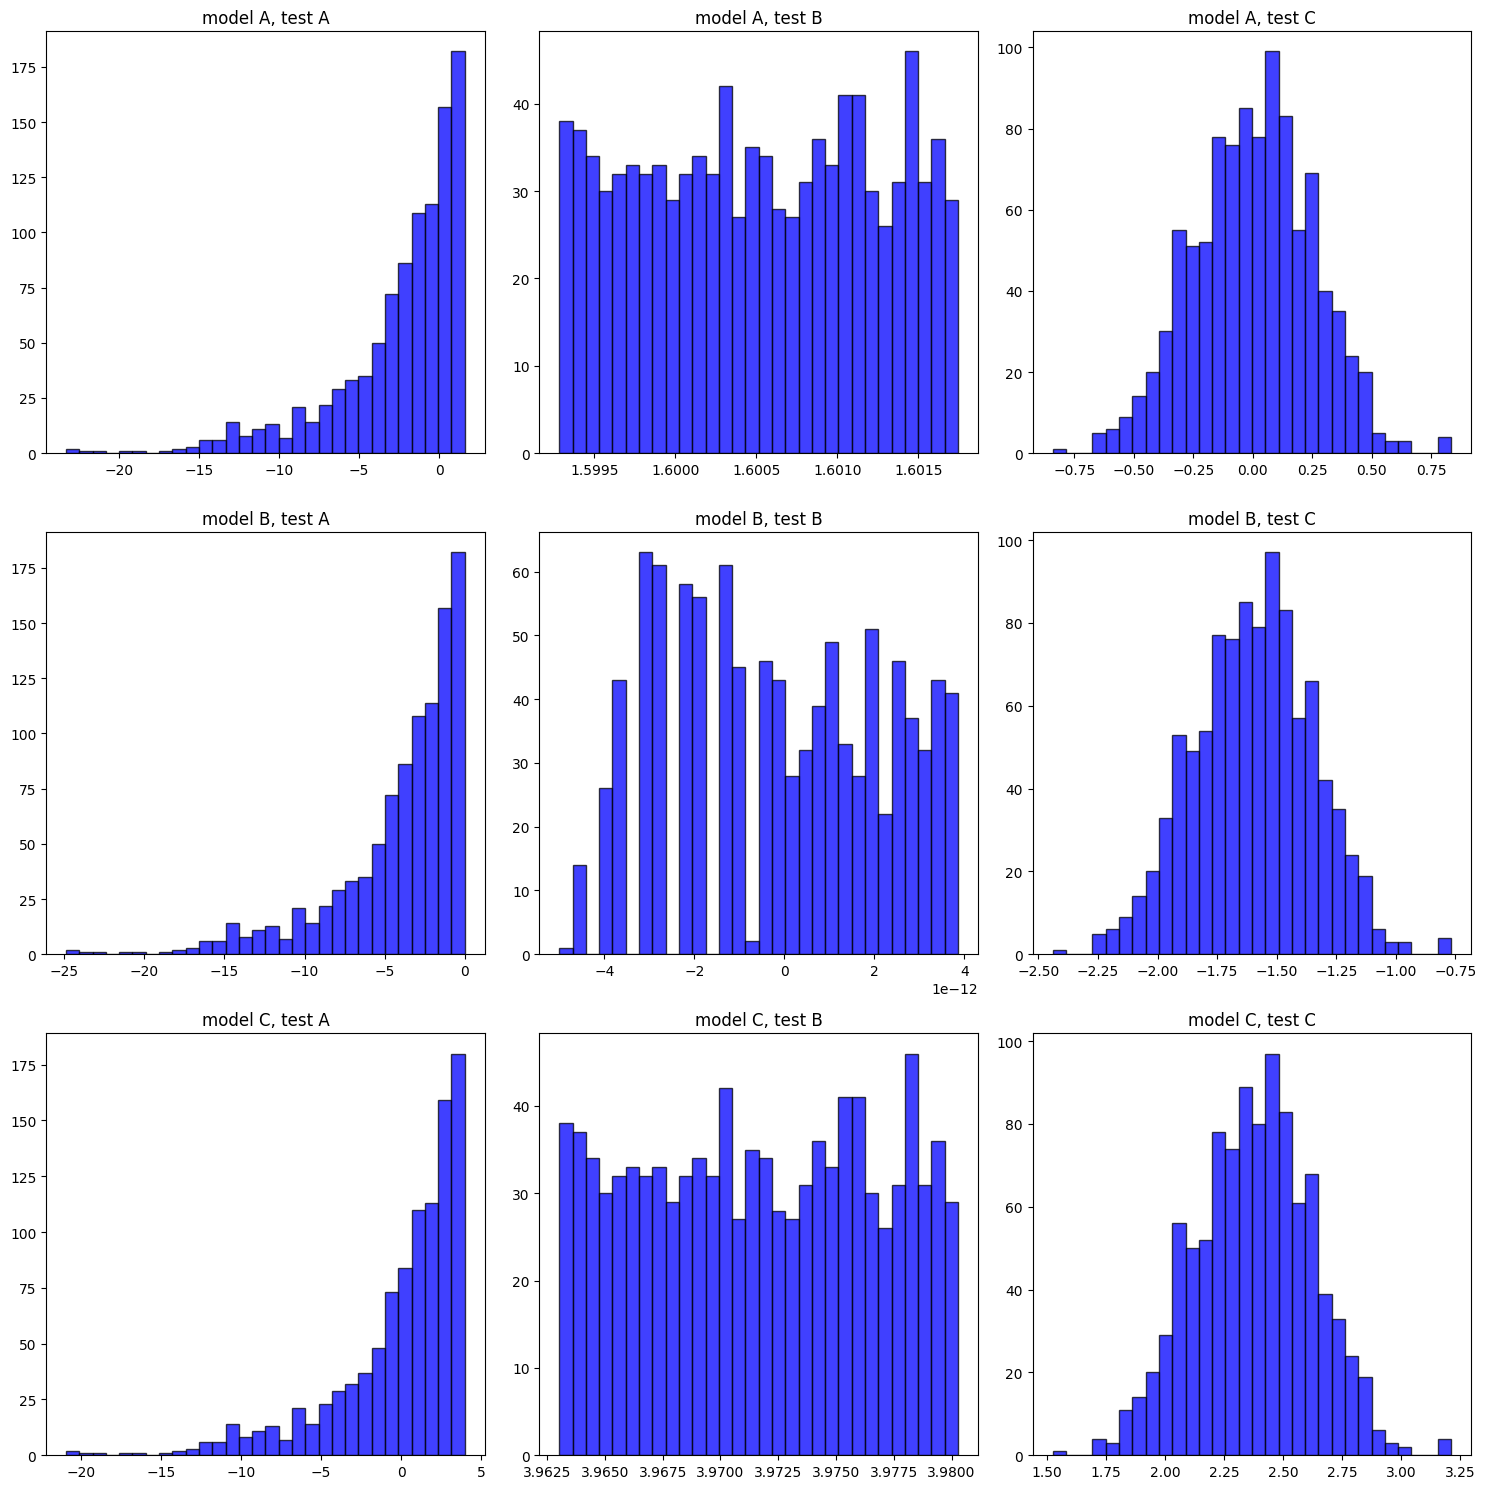

In [21]:
fig,axs=plt.subplots(3,3,figsize=(15,15))
datasets=[[aa_err,ab_err,ac_err],[ba_err,bb_err,bc_err],[ca_err,cb_err,cc_err]]
dict={0:"A",1:"B",2:"C"}
for i in {0,1,2}:
    for j in {0,1,2}:
        ax=axs[i,j]
        ax.hist(datasets[i][j],bins=30,alpha=0.75,color="blue",edgecolor="black")
        ax.set_title(f"model {dict[i]}, test {dict[j]}")
plt.tight_layout()
plt.show()

**Question 3:**

In [34]:
import numpy as np
n_samples=100
Xclass0=np.random.randn(n_samples,2)+np.array([-2,-2])
Xclass1=np.random.randn(n_samples,2)+np.array([2,2])
X=np.vstack((Xclass0,Xclass1))
Y=np.hstack((np.zeros(n_samples),np.ones(n_samples)))

In [44]:
def g(z):
    return 1/(1+np.exp(-z))
def loglikelihood(x,y,theta):
    z = np.dot(x, theta)
    z = np.clip(g(z), 1e-15, 1-1e-15)
    logl = np.mean(y*np.log(z)+(1-y)*np.log(1-z))
    return logl
def pred(x,theta):
    return g(np.dot(x,theta))
def pred_bin(x,theta):
    z=g(np.dot(x,theta))
    return (z>=0.5).astype(int)
def batchgd(x,y,theta,n_iter=100):
    alpha=0.1
    errors=[]
    for i in range(0,n_iter):
        theta=(theta+alpha*np.dot((y-pred(x,theta)),x))
        error=loglikelihood(x,y,theta)
        errors.append(error)
    return theta,errors
def newton_method(x, y,theta, n_iter=50):
    errors = []
    for i in range(0,n_iter):
        predictions = pred(x,theta)
        error = loglikelihood(x, y, theta)
        errors.append(error)
        gradient = -np.dot((y-pred(x,theta)),x)
        w = np.diag(predictions*(1-predictions))
        hessian = np.dot(np.dot(x.T, w), x)
        theta = theta-np.dot(np.linalg.inv(hessian), gradient)
    return theta, errors

In [45]:
from sklearn.metrics import accuracy_score
import time
theta=np.array([1,1])
start_time_gd = time.time()    
weights_gd, errors_gd = batchgd(X, Y,theta)
end_time_gd = time.time()
run_time_gd = end_time_gd-start_time_gd
theta=np.array([1,1])
start_time_nm = time.time()
weights_nm, errors_nm = newton_method(X, Y,theta)
end_time_nm = time.time()
run_time_nm = end_time_nm-start_time_nm
pred_gd = pred_bin(X, weights_gd)
pred_nm = pred_bin(X, weights_nm)
accuracy_gd = accuracy_score(Y, pred_gd)
accuracy_nm = accuracy_score(Y, pred_nm)
print(f'accuracy using gradient descent: {accuracy_gd} with run-time: {run_time_gd}')
print(f'accuracy using newton method: {accuracy_nm} with run-time: {run_time_nm}')


accuracy using gradient descent: 0.995 with run-time: 0.012635231018066406
accuracy using newton method: 0.995 with run-time: 0.02735447883605957


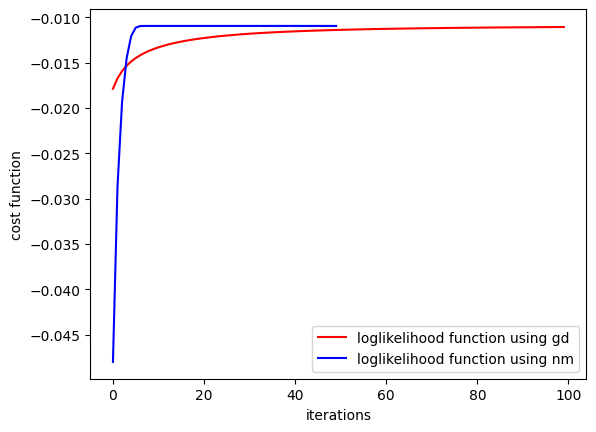

In [46]:
import matplotlib.pyplot as plt

x1 = np.arange(0, 100)
x2 = np.arange(0, 50)
plt.plot(x1, errors_gd, color='red', label='loglikelihood function using gd')
plt.plot(x2, errors_nm, color='blue', label='loglikelihood function using nm')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.legend()

as we can see from the plot that newtons method reaches a higher value much quicker but consumes more time and as features increase the time taken will go higher because the complexity of calculating the inverse of the hessian gets more and more complex but for only 2 features newtons method is much better than batch gradient descent

**Question 4:**<br><br>
**a)** With a large sample size n, flexible methods can learn complex patterns in the data without overfitting, as the large number of observations provides sufficient information to estimate the relationship between the predictors and the response.Flexible methods typically have lower bias but higher variance. However, when n is large, the variance of the flexible method decreases because the model has enough data to generalize well. The overall error is minimized when the bias is low.<br><br>
**b)** When p is large and n is small, flexible methods are prone to overfitting because they can capture noise in the data, leading to poor generalization to new data. Inflexible methods have higher bias and lower variance thus less likely to overfit and perform better for a small value of n
<br><br>
**c)** flexible methods are better at capturing complex and non-linear relationships in the data than inflexble methods. the non linearity in the data causes inflexible methods to have large biases and although flexible methods have larger variance, they have much lower bias and hence work better.

**Exponential families and GLM's**

**Question 1:**

**Part a)** <br> $p(y;\phi)=(1-\phi)^{y-1}\phi$<br>
$p(y;\phi)=e^{(y-1)log(1-\phi)+log(\phi)}$<br>
comparing with the exponential family<br>
$b(y)=1$<br>
$T(y)=y$<br>
$\eta=log(1-\phi)$<br>
$a(\eta)=log(\frac{\phi}{1-\phi})=log(e^{-\eta}-1)$

**Part b)** <br>
the mean of the relationship is given by $\mu=\frac{1-\phi}{\phi}$<br>
therefore the canonical link function $g(\mu)$ is:<br>
$g(\mu)=log(\mu+1)$

**Part c)** <br>
$log(P(y|x;\theta))=y(x^T.\theta)-log(e^{-x^T.\theta}-1)$,<br>
differentiating wrt to $\theta_j$ :<br>
$\frac{\partial logp(y|x;\theta)}{\partial \theta_j}= yx_j+(\frac{e^{x^T\theta}}{e^{x^T\theta}-1})x_j$
<br> this gives the gradient ascent update rule as:<br>
$\theta_j=\theta_j+\alpha(y.x_j+(\frac{e^{x^T\theta}}{e^{x^T\theta}-1})x_j)$

**Question 2:**

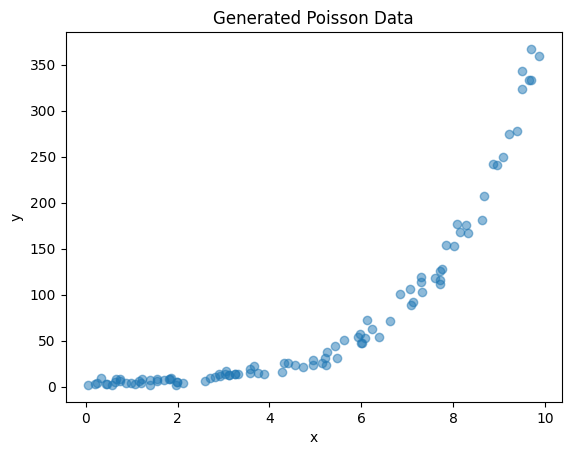

Mean Squared Error: 67.36738622079729


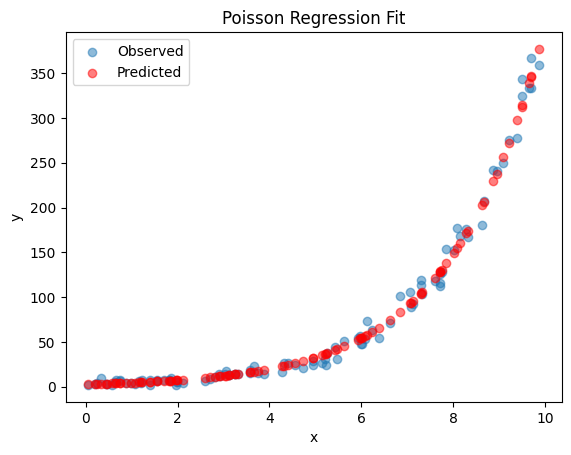

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
n = 100
x = np.random.rand(n) * 10  # predictor
beta_0 = 1
beta_1 = 0.5
log_lambda = beta_0 + beta_1 * x
lambda_ = np.exp(log_lambda)
y = np.random.poisson(lambda_)

data = pd.DataFrame({'x': x, 'y': y})

plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Poisson Data')
plt.show()

model = PoissonRegressor()
model.fit(x.reshape(-1, 1), y)

y_pred = model.predict(x.reshape(-1, 1))

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(x, y, alpha=0.5, label='Observed')
plt.scatter(x, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poisson Regression Fit')
plt.legend()
plt.show()
